<a href="https://colab.research.google.com/github/ABDELRAHIMAQQAD/Hands-On-Fraud-Analytics/blob/main/Chapter_9_Advanced_Feature_Engineering_Techniques_for_Fraud_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Example 9-1. Time feature in Python - Fraud Detection in Online Banking Transactions**

**Context**: An online banking platform has noticed an increasing number of fraudulent transactions in recent months. The company wants to identify patterns in the transaction data that could help detect potential fraud and enhance the security of their platform.

**Objectives**:
-	Analyze transaction timestamps to identify potential patterns related to fraudulent activities.
-	Develop a visualization method to represent the timing of transactions effectively.
-	Determine suspicious transactions that deviate from the typical transaction patterns.
Data: The dataset consists of transaction timestamps (in hours) for a sample of online banking transactions. The timestamps represent the time of day when the transactions occurred.

**Analysis:**
-	Load the transaction timestamp data and create a circular histogram to visualize the distribution of transaction times.
-	Calculate the arithmetic mean and periodic mean of the timestamps to identify central tendencies in the transaction times.
-	Estimate parameters mu (periodic mean) and kappa (concentration) from the von Mises distribution to analyze the circular data.
-	Calculate a confidence interval and visualize it on the circular histogram to identify the range of expected transaction times.
-	Determine potentially fraudulent transactions that fall outside the confidence interval and visualize them on the histogram.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import vonmises
import seaborn as sns

# Simulating sample data for transaction timestamps (in hours)
np.random.seed(42)
timestamps = np.random.uniform(0, 24, 1000)

# Convert timestamps to DataFrame
df = pd.DataFrame({'timestamps': timestamps})
df.head()

,timestamps
0,8.988963
1,22.817143
2,17.567855
3,14.367804
4,3.744447


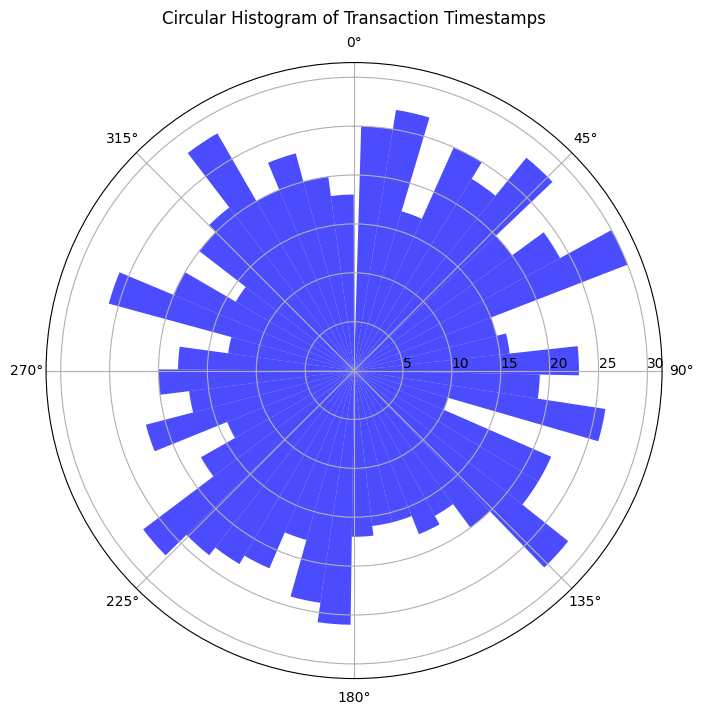

Total number of transactions: 1000
Average timestamp value: 11.77
Most frequent timestamp value: 0.11116855211046861
Maximum count in a bin: 30.0
Minimum count in a bin: 10.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Circular Histogram
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
n, _, _ = ax.hist(np.radians(df['timestamps'] * 15), bins=48, color='blue', alpha=0.7)  # Capture histogram values
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlabel_position(90)
ax.set_title("Circular Histogram of Transaction Timestamps", va='bottom')
plt.show()

# Printing results
print(f"Total number of transactions: {df['timestamps'].count()}")
print(f"Average timestamp value: {df['timestamps'].mean():.2f}")
print(f"Most frequent timestamp value: {df['timestamps'].mode().iloc[0]}")
print(f"Maximum count in a bin: {n.max()}")
print(f"Minimum count in a bin: {n.min()}")


In [ ]:
# Calculate the arithmetic mean
arithmetic_mean = df['timestamps'].mean()

# Calculate the periodic mean
r = np.sqrt(np.sum(np.sin(np.radians(df['timestamps'] * 15)))**2 + np.sum(np.cos(np.radians(df['timestamps'] * 15)))**2) / len(df)
theta = np.arctan2(np.sum(np.sin(np.radians(df['timestamps'] * 15))), np.sum(np.cos(np.radians(df['timestamps'] * 15))))
periodic_mean = np.degrees(theta) / 15
if periodic_mean < 0:
    periodic_mean += 24

# Estimate parameters for von Mises distribution
kappa = r * len(df)
mu = periodic_mean

arithmetic_mean, periodic_mean, mu, kappa

(11.766157279683206, 2.595393581412161, 2.595393581412161, 24.846299359108336)

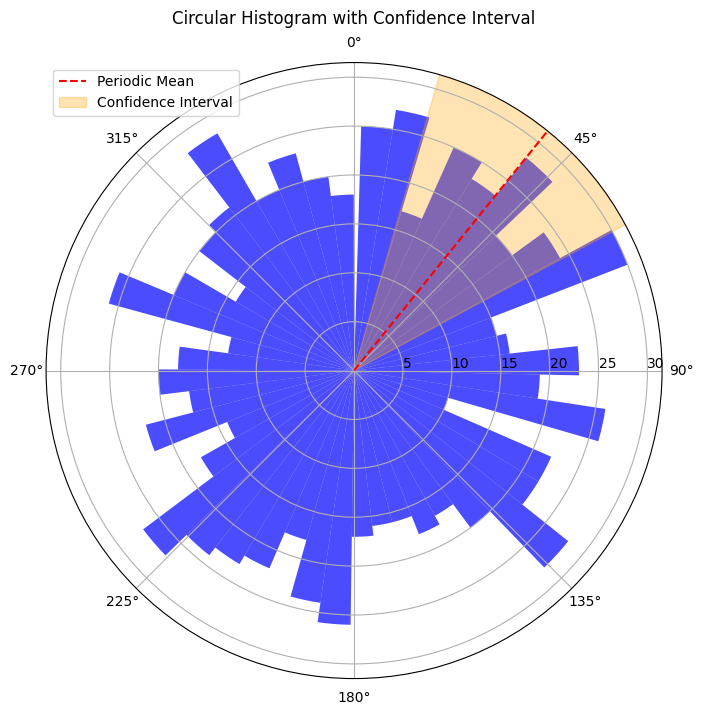

Periodic Mean (mu): 2.60
Confidence Interval: (1.08, 4.12) hours


In [ ]:
# Calculate confidence interval for von Mises distribution
alpha = 0.05
z = vonmises.ppf(1 - alpha/2, kappa)
conf_interval = (mu - np.degrees(z)/15, mu + np.degrees(z)/15)
if conf_interval[0] < 0:
    conf_interval = (conf_interval[0] + 24, conf_interval[1])
if conf_interval[1] > 24:
    conf_interval = (conf_interval[0], conf_interval[1] - 24)

# Plotting the circular histogram with confidence interval
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.hist(np.radians(df['timestamps'] * 15), bins=48, color='blue', alpha=0.7)
ax.axvline(np.radians(mu * 15), color='red', linestyle='dashed', label='Periodic Mean')
ax.axvspan(np.radians(conf_interval[0] * 15), np.radians(conf_interval[1] * 15), color='orange', alpha=0.3, label='Confidence Interval')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlabel_position(90)
ax.set_title("Circular Histogram with Confidence Interval", va='bottom')
ax.legend()
plt.show()

# Printing results
print(f"Periodic Mean (mu): {mu:.2f}")
print(f"Confidence Interval: ({conf_interval[0]:.2f}, {conf_interval[1]:.2f}) hours")


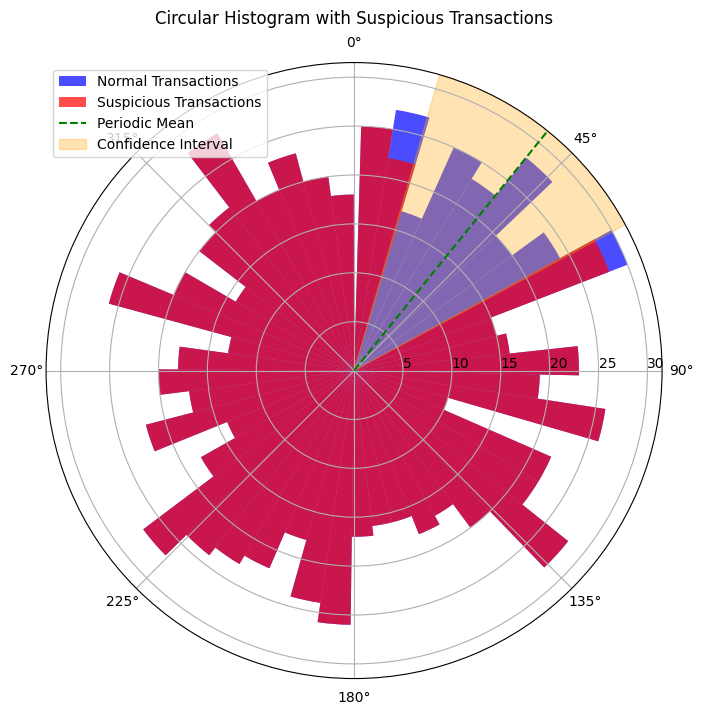

,timestamps
0,8.988963
1,22.817143
2,17.567855
3,14.367804
7,20.788227
...,...
993,14.165536
994,8.663374
996,22.015526
998,22.805696


In [ ]:
# Determine potentially fraudulent transactions
suspicious_transactions = df[(df['timestamps'] < conf_interval[0]) | (df['timestamps'] > conf_interval[1])]

# Plotting the circular histogram with suspicious transactions
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.hist(np.radians(df['timestamps'] * 15), bins=48, color='blue', alpha=0.7, label='Normal Transactions')
ax.hist(np.radians(suspicious_transactions['timestamps'] * 15), bins=48, color='red', alpha=0.7, label='Suspicious Transactions')
ax.axvline(np.radians(mu * 15), color='green', linestyle='dashed', label='Periodic Mean')
ax.axvspan(np.radians(conf_interval[0] * 15), np.radians(conf_interval[1] * 15), color='orange', alpha=0.3, label='Confidence Interval')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlabel_position(90)
ax.set_title("Circular Histogram with Suspicious Transactions", va='bottom')
ax.legend()
plt.show()

suspicious_transactions

**Example 9-2. Creating a Feature to Track Frequency for a Single Account**

**Context**: In the realm of fraud detection, understanding the frequency of specific events, such as the use of a particular payment channel, can be instrumental in identifying unusual activities. A frequency feature can help track how often a particular event has occurred in the past, providing valuable insights into user behavior patterns.

**Objectives**:

* To load and explore the transactional dataset.
* To generate a statistical summary and obtain dataset information.
* To visualize any missing values in the dataset.
* To create a frequency feature from the categorical feature "channel_cd" and understand its significance in the context of the dataset.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Let's read a CSV file using Pandas as follows
trans_df = pd.read_csv('trans.csv')


In [ ]:
# Explore the first five rows in the DataFrame
trans_df.head(3)

,fraud_flag,transfer_id,timestamp,account_name,benef_account_id,benef_country,channel_cd,authentication_cd,communication_cd,empty_communication_flag,orig_balance_before,amount,freq_channel,freq_auth
0,0,xtr146954,3823030,David,X58233569,ISO03,CH07,AU02,COM01,0,1074,549,0,0
1,0,xtr337000,4675604,Helen,X61279665,ISO03,CH04,AU03,COM02,0,701,37,0,0
2,0,xtr582322,4963503,David,X22723109,ISO03,CH07,AU04,COM01,0,1902,25,1,0


In [ ]:
# Explore the last five rows in the DataFrame
trans_df.tail()

,fraud_flag,transfer_id,timestamp,account_name,benef_account_id,benef_country,channel_cd,authentication_cd,communication_cd,empty_communication_flag,orig_balance_before,amount,freq_channel,freq_auth
35,0,xtr190256,35178952,Helen,X74704643,ISO03,CH04,AU05,COM03,1,766,126,14,8
36,0,xtr622883,35179134,David,X39509284,ISO03,CH06,AU02,COM02,0,645,22,4,7
37,0,xtr433797,36302300,Helen,X31470783,ISO03,CH04,AU03,COM01,0,837,41,15,6
38,1,xtr907138,38132166,David,X23634843,ISO03,CH05,AU03,COM03,1,4290,3779,0,0
39,1,xtr142625,38296341,Helen,X65617711,ISO03,CH05,AU04,COM03,1,1987,1531,0,0


In [ ]:
# Generate statistical summary
trans_df.describe()

,fraud_flag,timestamp,empty_communication_flag,orig_balance_before,amount,freq_channel,freq_auth
count,40.000000,4.000000e+01,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.050000,1.966303e+07,0.175000,1247.525000,234.400000,4.175000,3.025000
std,0.220721,1.246814e+07,0.384808,726.601326,637.491832,4.331681,2.347803
min,0.000000,3.823030e+06,0.000000,636.000000,13.000000,0.000000,0.000000
25%,0.000000,6.400481e+06,0.000000,777.250000,37.000000,1.000000,1.000000
50%,0.000000,2.219680e+07,0.000000,896.500000,49.000000,3.000000,3.000000
75%,0.000000,3.239715e+07,0.000000,1750.250000,87.000000,6.250000,5.000000
max,1.000000,3.829634e+07,1.000000,4290.000000,3779.000000,15.000000,8.000000


In [ ]:
# Obtain dataset information
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   fraud_flag                40 non-null     int64 
 1   transfer_id               40 non-null     object
 2   timestamp                 40 non-null     int64 
 3   account_name              40 non-null     object
 4   benef_account_id          40 non-null     object
 5   benef_country             40 non-null     object
 6   channel_cd                40 non-null     object
 7   authentication_cd         40 non-null     object
 8   communication_cd          40 non-null     object
 9   empty_communication_flag  40 non-null     int64 
 10  orig_balance_before       40 non-null     int64 
 11  amount                    40 non-null     int64 
 12  freq_channel              40 non-null     int64 
 13  freq_auth                 40 non-null     int64 
dtypes: int64(7), object(7)
memor

<Axes: >

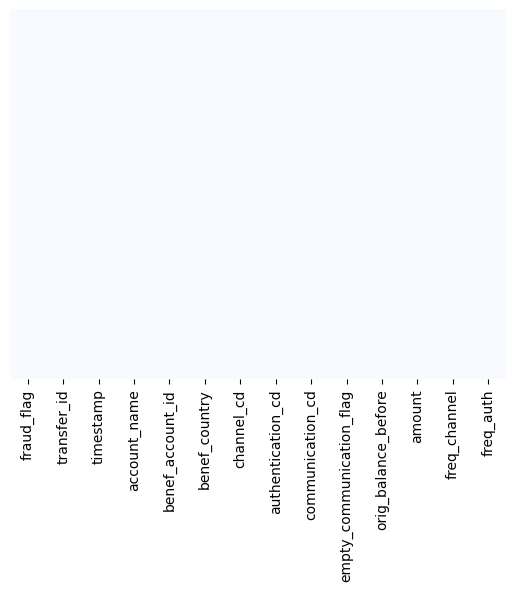

In [ ]:
# now plot the heatmap with missing values represented as 'np.nan'
sns.heatmap(trans_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")


In [ ]:
# creating a new column freq_channel in the DataFrame trans_ David_df, which represents the cumulative count of occurrences for each unique payment channel ('channel_cd').

trans_df['freq_channel'] = trans_df.groupby(['channel_cd']).cumcount()
# Print the features "channel_cd", "freq_channel", and "fraud_flag"
print(trans_df[['channel_cd', 'freq_channel', 'fraud_flag']])


   channel_cd  freq_channel  fraud_flag
0        CH07             0           0
1        CH04             0           0
2        CH07             1           0
3        CH06             0           0
4        CH07             2           0
5        CH06             1           0
6        CH04             1           0
7        CH07             3           0
8        CH01             0           0
9        CH02             0           0
10       CH06             2           0
11       CH03             0           0
12       CH04             2           0
13       CH04             3           0
14       CH04             4           0
15       CH07             4           0
16       CH07             5           0
17       CH07             6           0
18       CH01             1           0
19       CH04             5           0
20       CH02             1           0
21       CH04             6           0
22       CH04             7           0
23       CH07             7           0


**Example 9-3. Generating Frequency Feature for Multiple Accounts**

In [ ]:
import pandas as pd

# Let's read a CSV file using Pandas as follows
trans_df = pd.read_csv('trans.csv')

# Assuming trans is your DataFrame and it's already loaded
trans_df['freq_channel'] = trans_df.groupby(['account_name', 'channel_cd']).cumcount()

# Print the features "account_name", "channel_cd", "freq_channel", and "fraud_flag"
print(trans_df[['account_name', 'channel_cd', 'freq_channel', 'fraud_flag']])


   account_name channel_cd  freq_channel  fraud_flag
0         David       CH07             0           0
1         Helen       CH04             0           0
2         David       CH07             1           0
3         David       CH06             0           0
4         Helen       CH07             0           0
5         David       CH06             1           0
6         Helen       CH04             1           0
7         David       CH07             2           0
8         Helen       CH01             0           0
9         David       CH02             0           0
10        David       CH06             2           0
11        Helen       CH03             0           0
12        Helen       CH04             2           0
13        Helen       CH04             3           0
14        Helen       CH04             4           0
15        David       CH07             3           0
16        David       CH07             4           0
17        David       CH07             5      